In [187]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df = pd.read_csv('Churn_Modelling.csv')

In [189]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ***partie de compréhension***

### Description des données clients d'une banque

| Colonne            | Description |
|-----------------------|----------------|
| `RowNumber`           | Numéro de la ligne dans le fichier (identifiant temporaire) |
| `CustomerId`          | Identifiant unique du client |
| `Surname`             | Nom de famille du client |
| `CreditScore`         | Score de crédit du client (indique sa solvabilité) |
| `Geography`           | Pays du client (France, Espagne, Allemagne, etc.) |
| `Gender`              | Sexe du client (`Male` ou `Female`) |
| `Age`                 | Âge du client |
| `Tenure`              | Nombre d’années passées dans la banque |
| `Balance`             | Solde actuel du compte bancaire |
| `NumOfProducts`       | Nombre de produits souscrits par le client |
| `HasCrCard`           | Possède une carte de crédit ? (`1` = Oui, `0` = Non) |
| `IsActiveMember`      | Est un membre actif de la banque ? (`1` = Oui, `0` = Non) |
| `EstimatedSalary`     | Salaire estimé du client |
| `Exited`              | Le client a-t-il quitté la banque ? (`1` = Oui, `0` = Non) |

In [190]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [191]:
df.shape

(10000, 14)

In [192]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Les colonnes qui n'ont pas numérique :

In [194]:
df.select_dtypes(include='object').columns 

Index(['Surname', 'Geography', 'Gender'], dtype='object')

#### Les colonnes qui ont numérique :

In [195]:
df.select_dtypes(exclude='object').columns 

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

#### Avoir combien a-t-il des valeurs unique pour objets :

In [196]:
for col in df.select_dtypes(include='object').columns : 
    print(f"{col} : {df[col].nunique()}")

Surname : 2932
Geography : 3
Gender : 2


#### Avoir combien a-t-il des valeurs unique pour les numériques :

In [197]:
for col in df.select_dtypes(exclude='object').columns : 
    print(f"{col} : {df[col].nunique()}")

RowNumber : 10000
CustomerId : 10000
CreditScore : 460
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2


####  Boîtes à moustaches (boxplots) pour détecter les valeurs aberrantes :

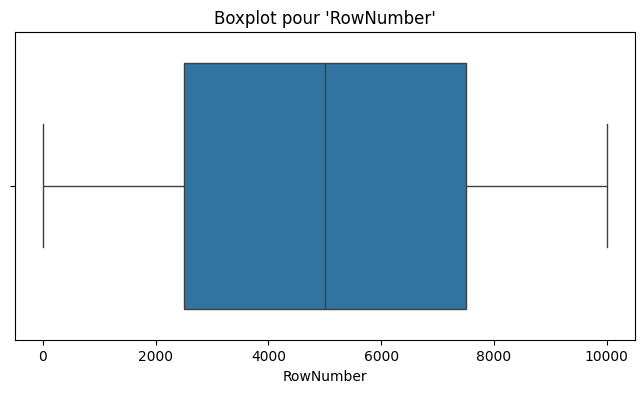

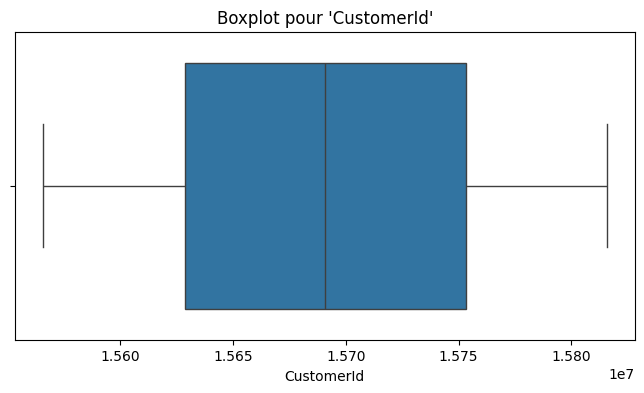

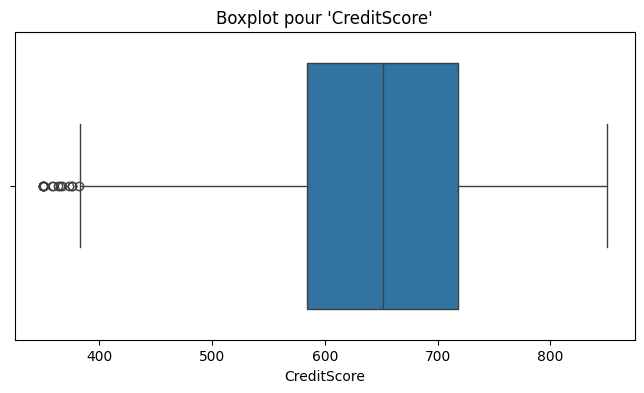

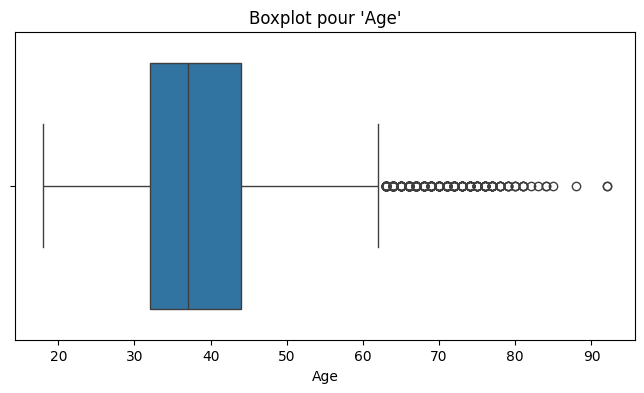

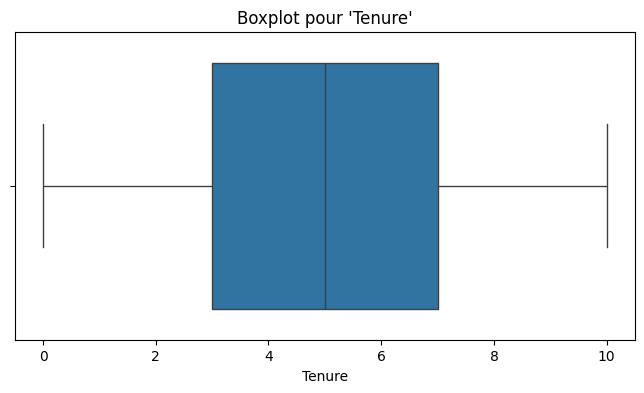

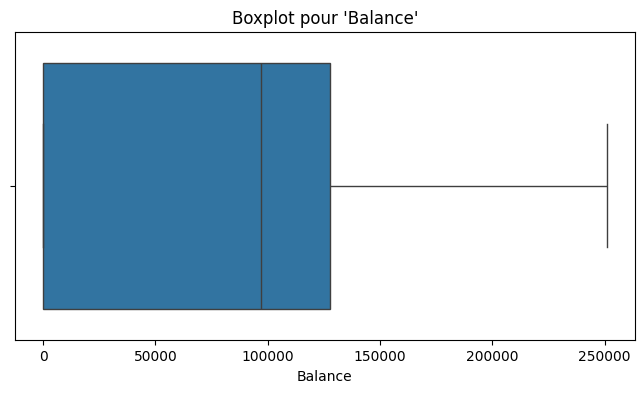

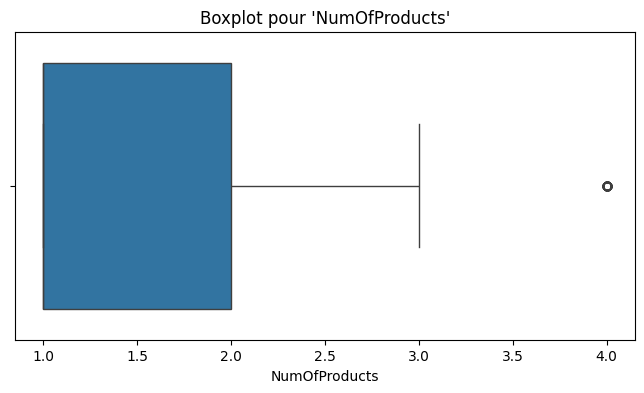

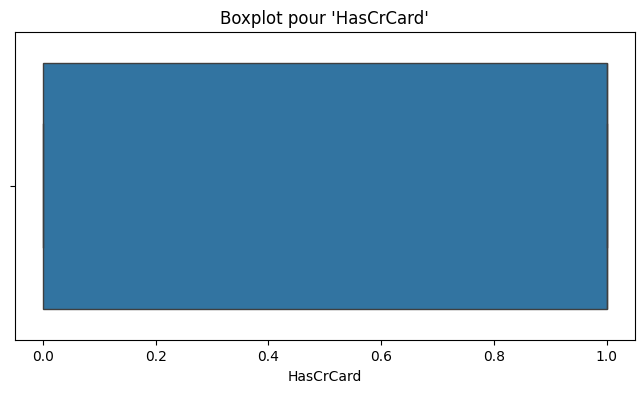

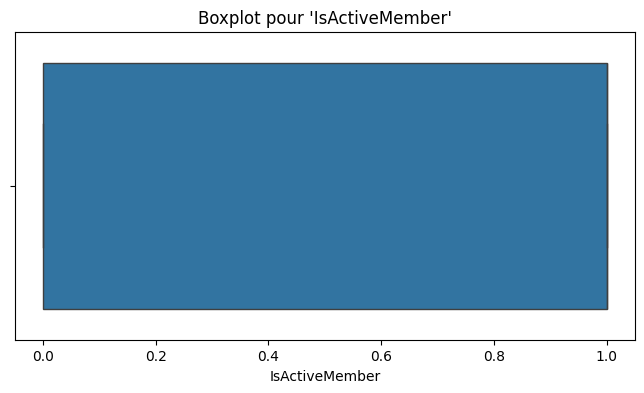

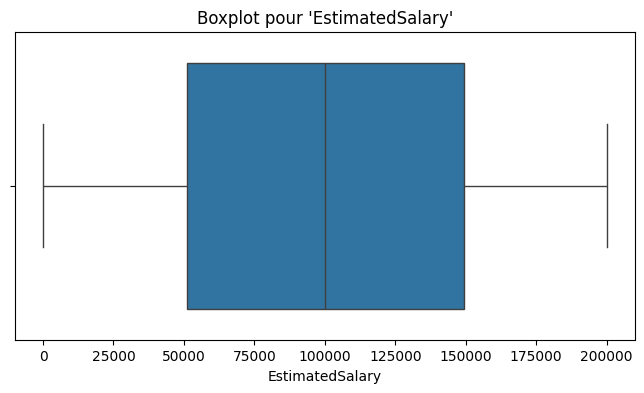

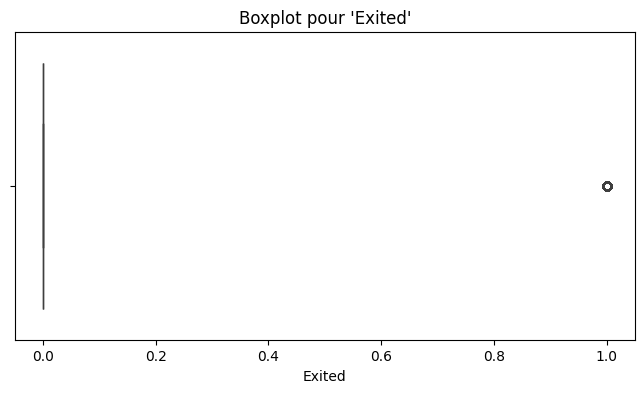

In [198]:
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
for col in colonnes_numeriques:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot pour '{col}'")
    plt.show()

# ***analyse de donnéé***

### Histogrammes pour voir la distribution.

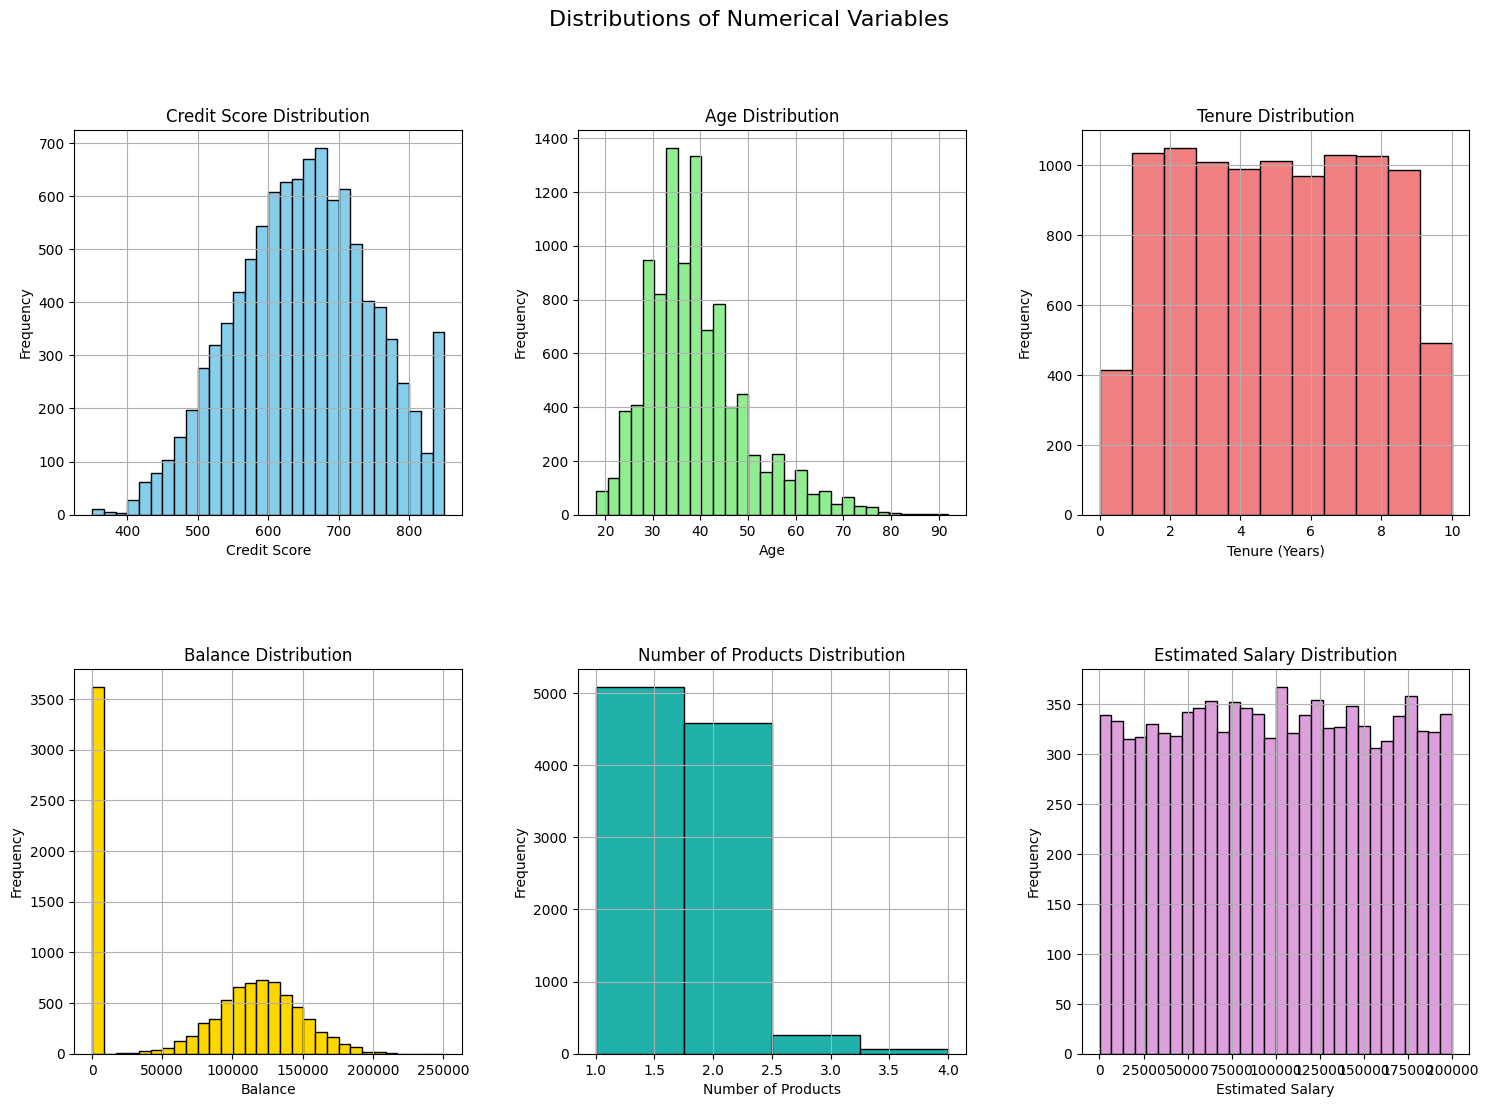

In [199]:
# Create figure and axes for histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Distributions of Numerical Variables', fontsize=16)

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Create histograms
df['CreditScore'].hist(ax=axes[0, 0], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Credit Score Distribution')
axes[0, 0].set_xlabel('Credit Score')
axes[0, 0].set_ylabel('Frequency')

df['Age'].hist(ax=axes[0, 1], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

df['Tenure'].hist(ax=axes[0, 2], bins=11, color='lightcoral', edgecolor='black', align='mid')
axes[0, 2].set_title('Tenure Distribution')
axes[0, 2].set_xlabel('Tenure (Years)')
axes[0, 2].set_ylabel('Frequency')

df['Balance'].hist(ax=axes[1, 0], bins=30, color='gold', edgecolor='black')
axes[1, 0].set_title('Balance Distribution')
axes[1, 0].set_xlabel('Balance')
axes[1, 0].set_ylabel('Frequency')

df['NumOfProducts'].hist(ax=axes[1, 1], bins=4, color='lightseagreen', edgecolor='black', align='mid')
axes[1, 1].set_title('Number of Products Distribution')
axes[1, 1].set_xlabel('Number of Products')
axes[1, 1].set_ylabel('Frequency')

df['EstimatedSalary'].hist(ax=axes[1, 2], bins=30, color='plum', edgecolor='black')
axes[1, 2].set_title('Estimated Salary Distribution')
axes[1, 2].set_xlabel('Estimated Salary')
axes[1, 2].set_ylabel('Frequency')

plt.show()


### Boxplots pour détecter les valeurs extrêmes (outliers).

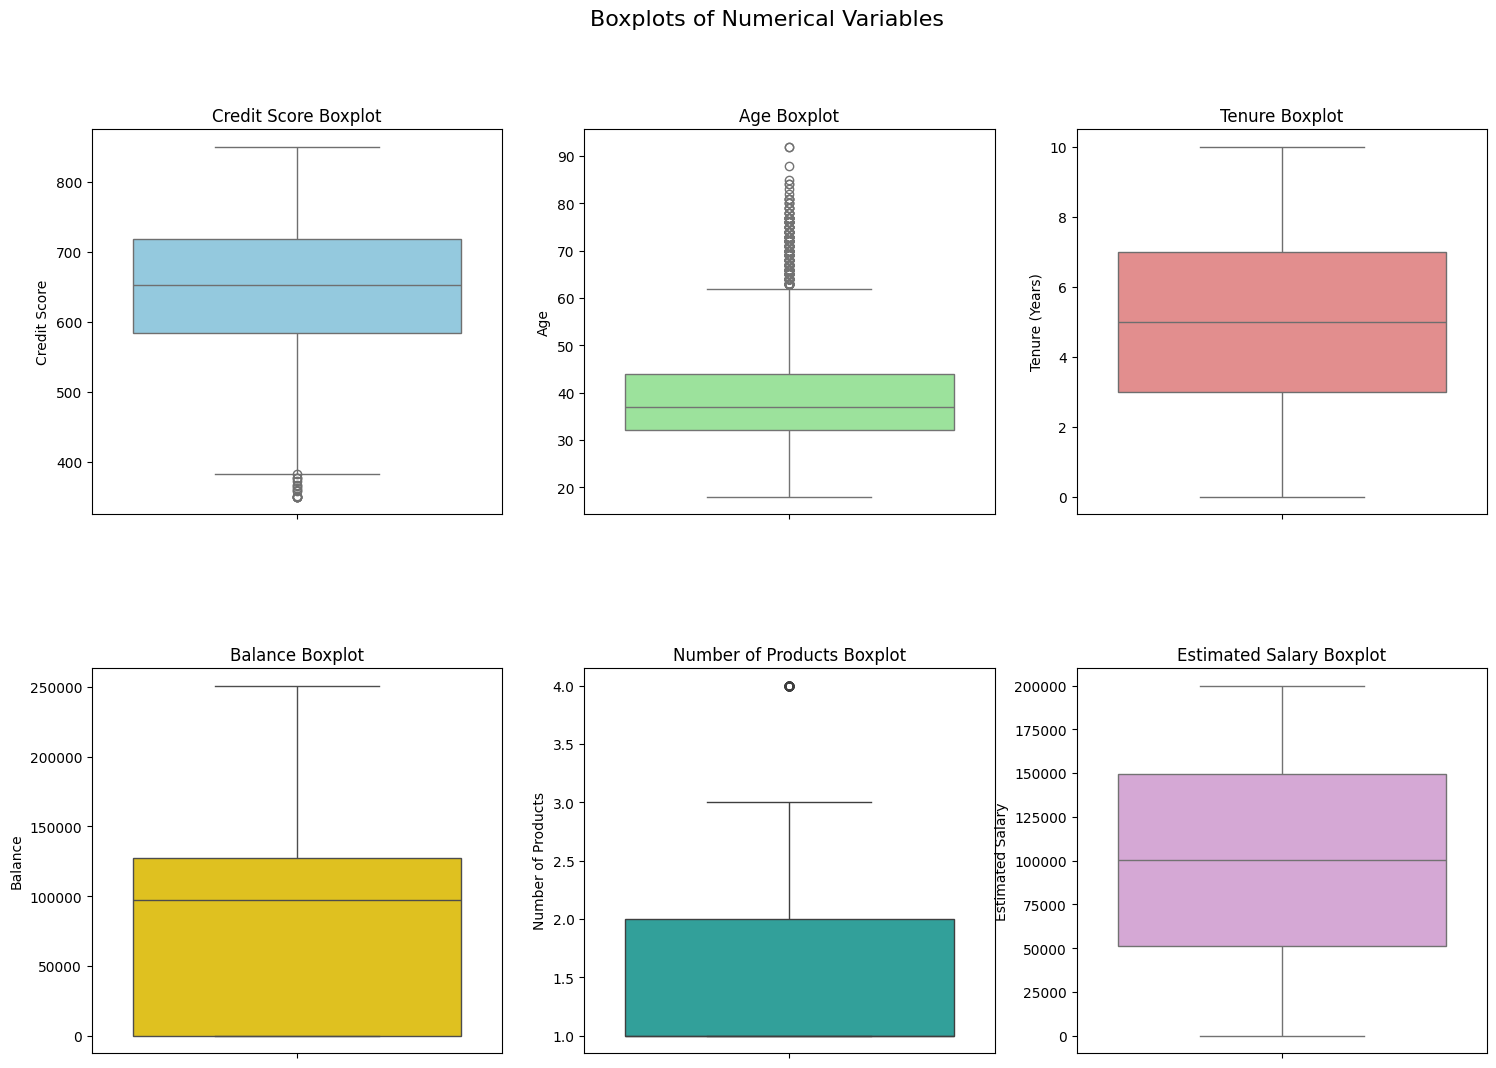

In [200]:
# Create boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Boxplots of Numerical Variables', fontsize=16)

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.4)

sns.boxplot(y=df['CreditScore'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Credit Score Boxplot')
axes[0, 0].set_ylabel('Credit Score')

sns.boxplot(y=df['Age'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Age Boxplot')
axes[0, 1].set_ylabel('Age')

sns.boxplot(y=df['Tenure'], ax=axes[0, 2], color='lightcoral')
axes[0, 2].set_title('Tenure Boxplot')
axes[0, 2].set_ylabel('Tenure (Years)')

sns.boxplot(y=df['Balance'], ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Balance Boxplot')
axes[1, 0].set_ylabel('Balance')

sns.boxplot(y=df['NumOfProducts'], ax=axes[1, 1], color='lightseagreen')
axes[1, 1].set_title('Number of Products Boxplot')
axes[1, 1].set_ylabel('Number of Products')

sns.boxplot(y=df['EstimatedSalary'], ax=axes[1, 2], color='plum')
axes[1, 2].set_title('Estimated Salary Boxplot')
axes[1, 2].set_ylabel('Estimated Salary')

plt.show()

### Graphes en barres pour comparer des catégories

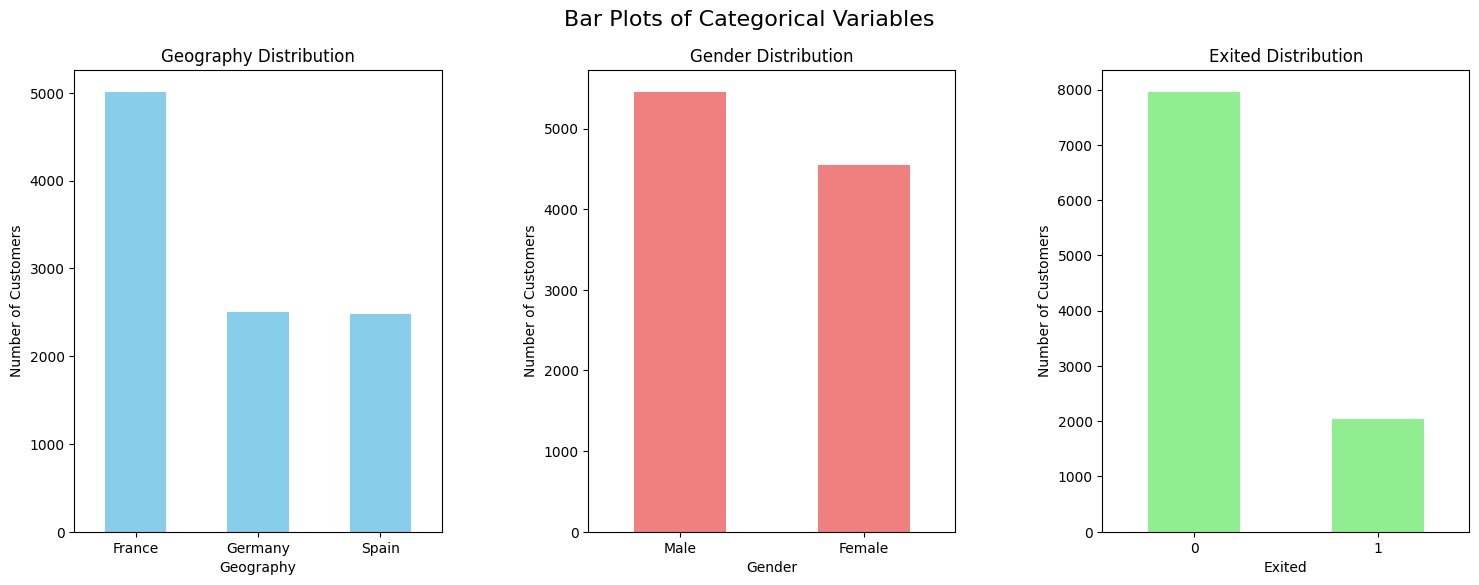

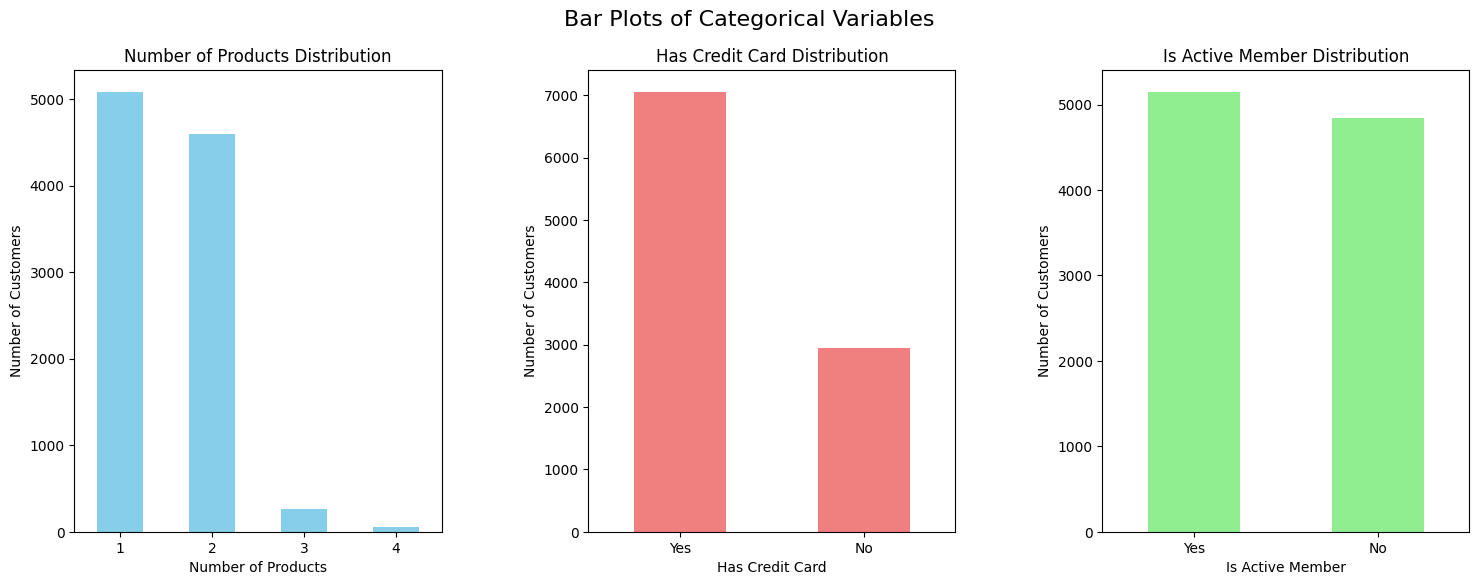

In [201]:
# Combine Geography, Gender, and Exited distributions into a single figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Bar Plots of Categorical Variables', fontsize=16)

# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=0.4)

# Geography
df['Geography'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Geography Distribution')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=0)

# Gender
df['Gender'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Number of Customers')
axes[1].tick_params(axis='x', rotation=0)

# Exited
df['Exited'].value_counts().plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Exited Distribution')
axes[2].set_xlabel('Exited')
axes[2].set_ylabel('Number of Customers')
axes[2].tick_params(axis='x', rotation=0)

plt.show()

# Create bar plots for NumOfProducts, HasCrCard, and IsActiveMember
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Bar Plots of Categorical Variables', fontsize=16)

# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=0.4)

# NumOfProducts
df['NumOfProducts'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Number of Products Distribution')
axes[0].set_xlabel('Number of Products')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=0)

# HasCrCard
df['HasCrCard'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Has Credit Card Distribution')
axes[1].set_xlabel('Has Credit Card')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xticklabels(['Yes', 'No'], rotation=0)

# IsActiveMember
df['IsActiveMember'].value_counts().plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Is Active Member Distribution')
axes[2].set_xlabel('Is Active Member')
axes[2].set_ylabel('Number of Customers')
axes[2].set_xticklabels(['Yes', 'No'], rotation=0)

plt.show()


### Graphes de dispersion (scatter plots) pour voir les relations entre deux variables.

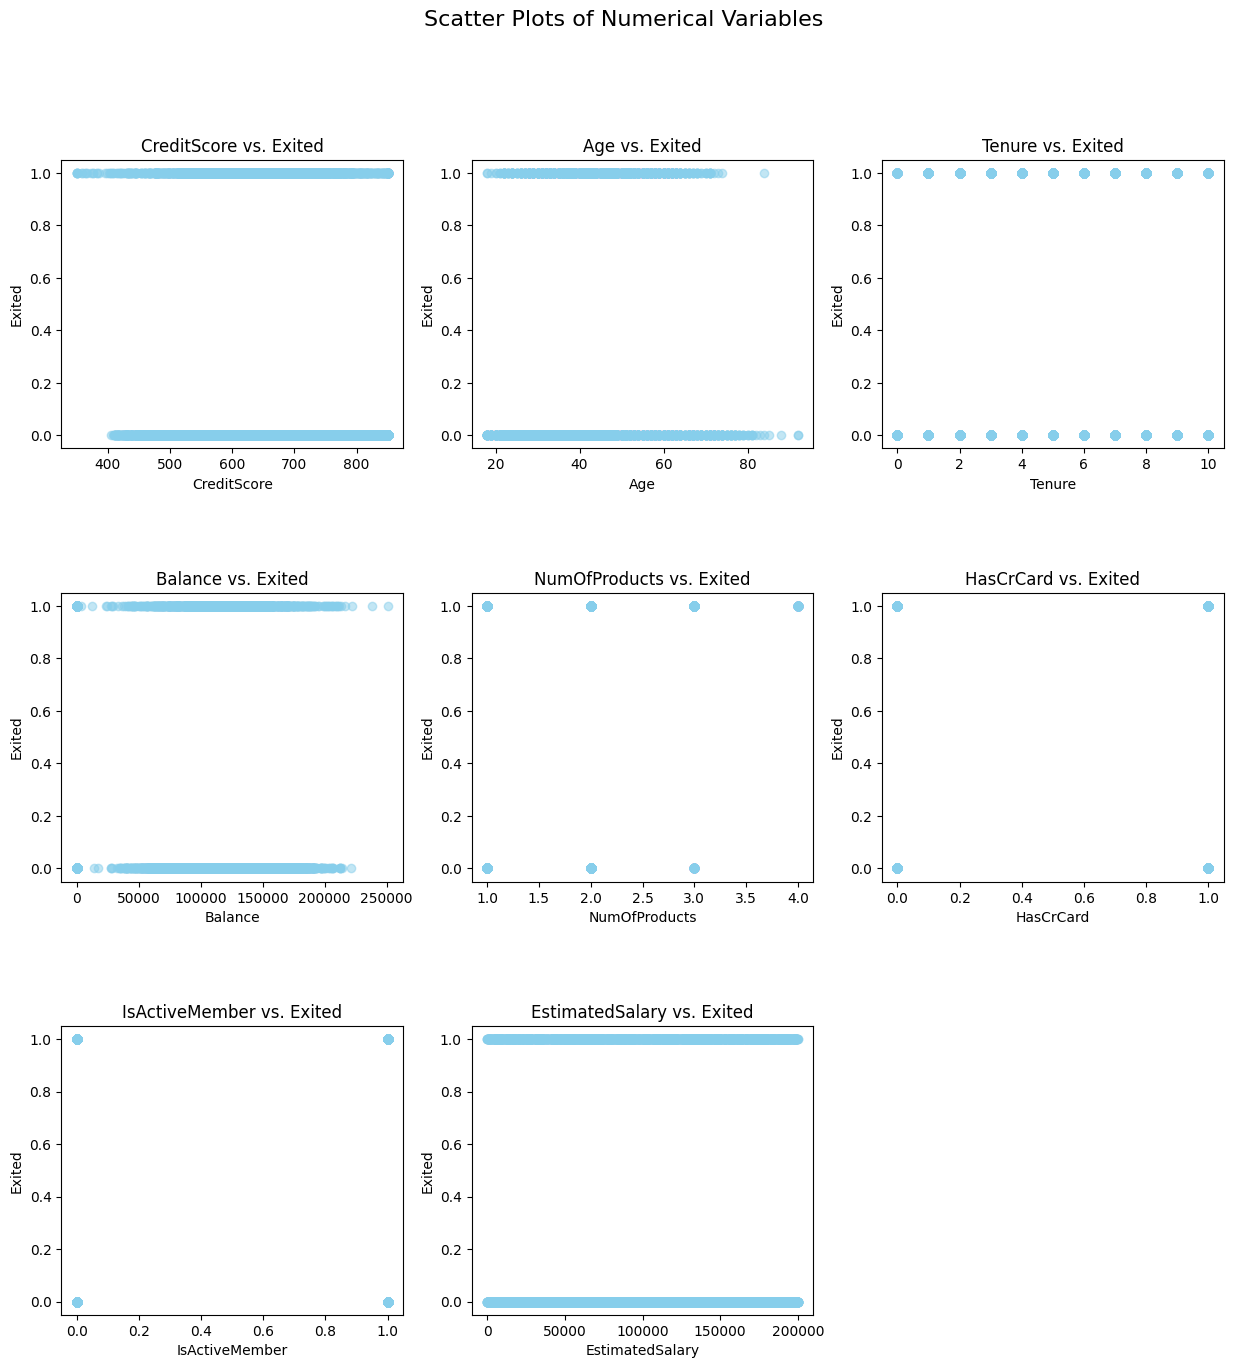

In [202]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude non-feature columns like RowNumber, CustomerId, and Exited
feature_cols = [col for col in numeric_cols if col not in ['RowNumber', 'CustomerId', 'Exited']]

# Determine the number of rows and columns for the subplots
num_cols = 3
num_rows = (len(feature_cols) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Scatter Plots of Numerical Variables', fontsize=16)
plt.subplots_adjust(hspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each pair of columns and create a scatter plot
for i, col in enumerate(feature_cols):
    ax = axes[i]
    ax.scatter(df[col], df['Exited'], color='skyblue', alpha=0.5)
    ax.set_title(f'{col} vs. Exited')
    ax.set_xlabel(col)
    ax.set_ylabel('Exited')

# Remove any unused subplots
if len(feature_cols) < len(axes):
    for i in range(len(feature_cols), len(axes)):
        fig.delaxes(axes[i])

plt.show()

# ***Nettoyage des données***

### Pour les valeurs  null :

In [203]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [204]:
df.isnull().sum().reset_index()

,index,0
0,RowNumber,0
1,CustomerId,0
2,Surname,0
3,CreditScore,0
4,Geography,0
5,Gender,0
6,Age,0
7,Tenure,0
8,Balance,0
9,NumOfProducts,0


##### Vérifions :

In [205]:
df.shape

(10000, 14)

In [206]:
df.isnull().sum().reset_index()

,index,0
0,RowNumber,0
1,CustomerId,0
2,Surname,0
3,CreditScore,0
4,Geography,0
5,Gender,0
6,Age,0
7,Tenure,0
8,Balance,0
9,NumOfProducts,0


#### Gestion Duplicates les valeurs :

In [207]:
df.duplicated().sum()

np.int64(0)

In [208]:
df.drop_duplicates(inplace=True)
print(f'Pour vérfifer : {df.duplicated().sum()}')

Pour vérfifer : 0


In [209]:
df.shape

(10000, 14)

#### __Une fonction pour nettoyer les valeurs aberrantes :__

In [210]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    df.dropna(inplace=True)
    return df


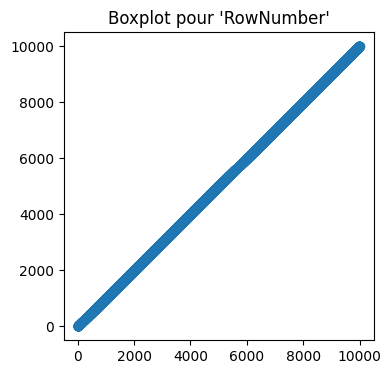

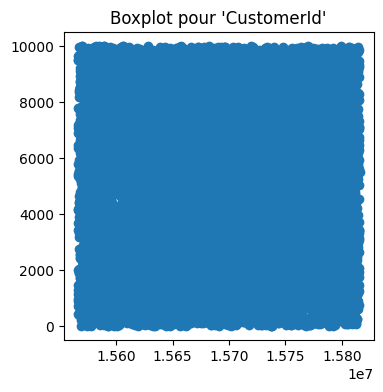

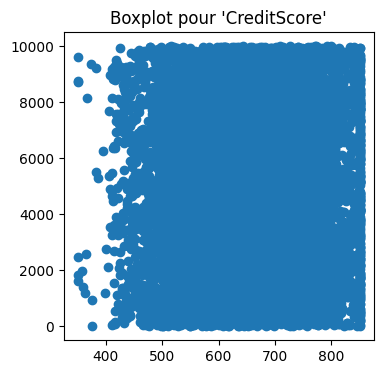

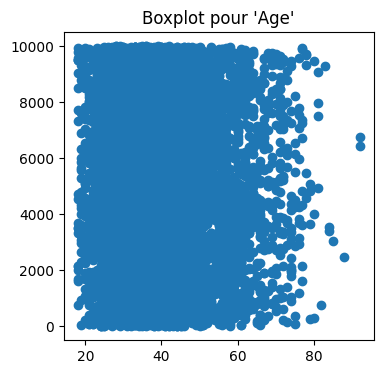

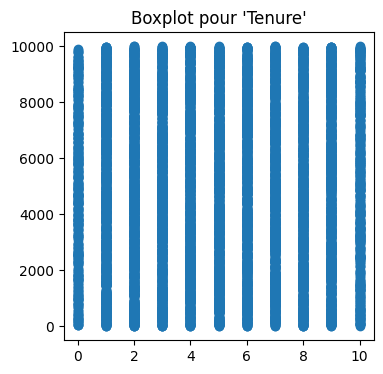

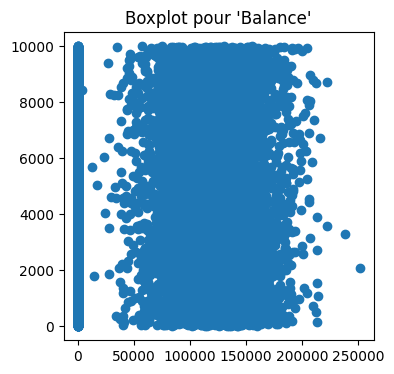

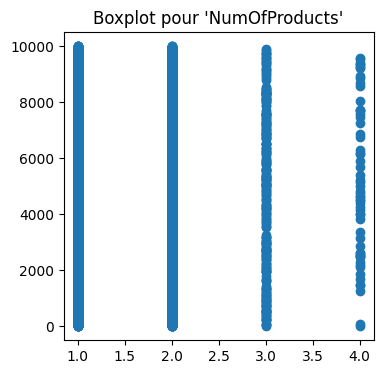

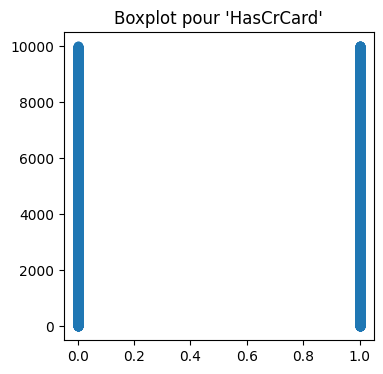

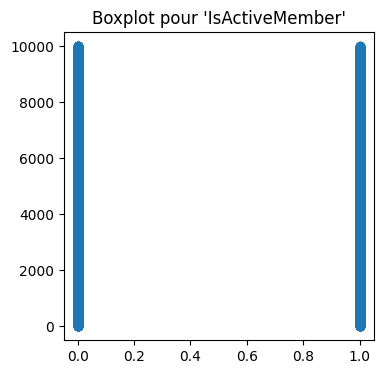

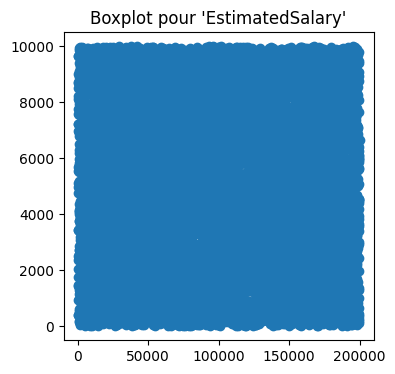

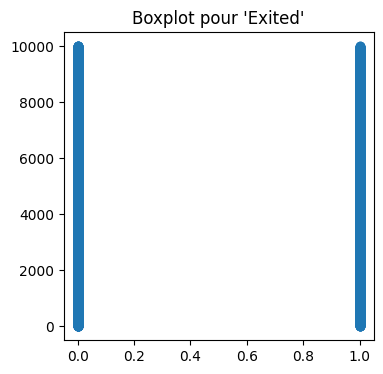

In [211]:
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
for col in colonnes_numeriques:
    plt.figure(figsize=(4, 4))
    plt.scatter(df[col], np.arange(len(df[col])))
    plt.title(f"Boxplot pour '{col}'")
    plt.show()

In [212]:
df.shape

(10000, 14)

In [213]:
# outliers = df[~df.index.isin(df_cleaned.index)]
# print("Valeurs supprimées (Z-score):")
# print(outliers)


#### Gestion Types : 

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [215]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ***préparer les donnée***

### Supprimer les colonnes dont nous n’aurons pas besoin

In [216]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

### ajouter des colomns

In [217]:
df['BalanceSalaryRatio'] = df['Balance'] / (df['EstimatedSalary'] + 1) 

### Convertir des colonnes categorique en nombres

In [218]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

### One-Hot Encoding

In [219]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Gender              10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  BalanceSalaryRatio  10000 non-null  float64
 11  Geography_Germany   10000 non-null  bool   
 12  Geography_Spain     10000 non-null  bool   
dtypes: bool(2), float64(3), int64(8)
memory usage: 879.0 KB


In [221]:
from sklearn.preprocessing import StandardScaler
normalisation = StandardScaler()
normalisation.fit_transform(df.select_dtypes(include=np.number))

array([[-0.32622142, -1.09598752,  0.29351742, ...,  0.02188649,
         1.97716468, -0.03788227],
       [-0.44003595, -1.09598752,  0.19816383, ...,  0.21653375,
        -0.50577476, -0.03043935],
       [-1.53679418, -1.09598752,  0.29351742, ...,  0.2406869 ,
         1.97716468, -0.02387576],
       ...,
       [ 0.60498839, -1.09598752, -0.27860412, ..., -1.00864308,
         1.97716468, -0.03788227],
       [ 1.25683526,  0.91241915,  0.29351742, ..., -0.12523071,
         1.97716468, -0.02980416],
       [ 1.46377078, -1.09598752, -1.04143285, ..., -1.07636976,
        -0.50577476, -0.00382343]])

In [222]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [223]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ***machine learning***

### regression 

### knn

### decision tree

### rendom forset

### svm